## **DEPARTMENT OF COMPUTER SCIENCE AND TECHNOLOGY**

### **Artificial Intelligence Lab (CS4271)**
### **Name: SAGAR BASAK**
### **Enrollment No: 2021CSB008**
### **Assignment: 1**

## **Question 1**

In the realm of Artificial Intelligence, contemplate a problem involving two containers
of indeterminate capacity, referred to as jugs. One jug has a capacity of 3 units, while
the other holds up to 4 units. There is no markings or additional measuring instruments,
the objective is to develop a strategic approach to precisely fill the 4-unit jug with 2
units of water. The restriction stipulates the use of solely the aforementioned jugs,
excluding any supplementary tools. Both jugs initiate the scenario in an empty state.
The aim is to attain the desired water quantity in the 4-unit jug by executing a sequence
of permissible operations, including filling, emptying, and pouring water between the
jugs. The challenge in this scenario involves crafting an algorithm:


1.   Define the permissible operations carefully that includes filling, emptying, and pouring water between the jugs.
2.   Use both Depth First Search and Breadth First Search to systematically explore and determine the optimal sequence of moves for accomplishing the task while adhering to the defined constraints. Also determine the total path count to reach to the goal state.
3.   The initial and the goal state of the jugs may be varied.


Problem 1:
Jug capacities: 3, 4
Target: 2

Starting with Jug1: 0, Jug2: 0
DFS - Found solution: True
DFS Path: [(0, 0), (0, 4), (3, 1), (3, 0), (0, 3), (3, 3), (2, 4), (2, 0), (0, 2)]
DFS States explored: 9
DFS Levels traversed: 8

BFS - Found solution: True
BFS Path: [(0, 0), (3, 0), (0, 3), (3, 3), (2, 4), (2, 0), (0, 2)]
BFS States explored: 14
BFS Levels traversed: 4

Starting with Jug1: 3, Jug2: 0
DFS - Found solution: True
DFS Path: [(3, 0), (0, 3), (0, 0), (0, 4), (3, 1), (0, 1), (1, 0), (1, 4), (3, 2)]
DFS States explored: 9
DFS Levels traversed: 8

BFS - Found solution: True
BFS Path: [(3, 0), (0, 3), (3, 3), (2, 4), (2, 0), (0, 2)]
BFS States explored: 19
BFS Levels traversed: 4

Starting with Jug1: 0, Jug2: 4
DFS - Found solution: True
DFS Path: [(0, 4), (3, 1), (3, 0), (0, 3), (3, 3), (2, 4), (2, 0), (0, 2)]
DFS States explored: 9
DFS Levels traversed: 9

BFS - Found solution: True
BFS Path: [(0, 4), (3, 1), (0, 1), (1, 0), (1, 4), (3, 2)]
BFS States explored: 19
BFS Level

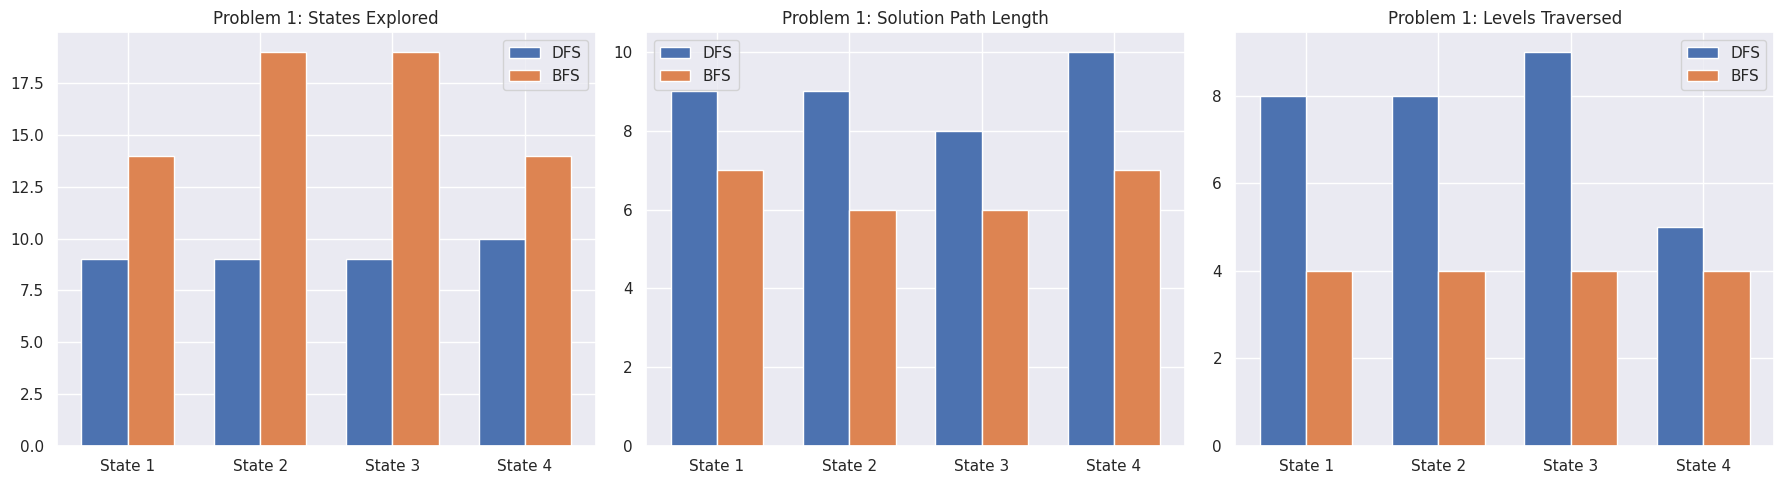


Problem 2:
Jug capacities: 5, 7
Target: 4

Starting with Jug1: 0, Jug2: 0
DFS - Found solution: True
DFS Path: [(0, 0), (0, 7), (5, 2), (5, 0), (0, 5), (5, 5), (3, 7), (3, 0), (0, 3), (5, 3), (1, 7), (1, 0), (0, 1), (5, 1), (0, 6), (5, 6), (4, 7), (4, 0), (0, 4)]
DFS States explored: 19
DFS Levels traversed: 13

BFS - Found solution: True
BFS Path: [(0, 0), (0, 7), (5, 2), (0, 2), (2, 0), (2, 7), (5, 4)]
BFS States explored: 15
BFS Levels traversed: 4

Starting with Jug1: 5, Jug2: 0
DFS - Found solution: True
DFS Path: [(5, 0), (0, 5), (0, 0), (0, 7), (5, 2), (0, 2), (2, 0), (2, 7), (5, 4)]
DFS States explored: 9
DFS Levels traversed: 8

BFS - Found solution: True
BFS Path: [(5, 0), (5, 7), (0, 7), (5, 2), (0, 2), (2, 0), (2, 7), (5, 4)]
BFS States explored: 25
BFS Levels traversed: 4

Starting with Jug1: 0, Jug2: 7
DFS - Found solution: True
DFS Path: [(0, 7), (5, 2), (5, 0), (0, 5), (5, 5), (3, 7), (3, 0), (0, 3), (5, 3), (1, 7), (1, 0), (0, 1), (5, 1), (0, 6), (5, 6), (4, 7), (4, 0

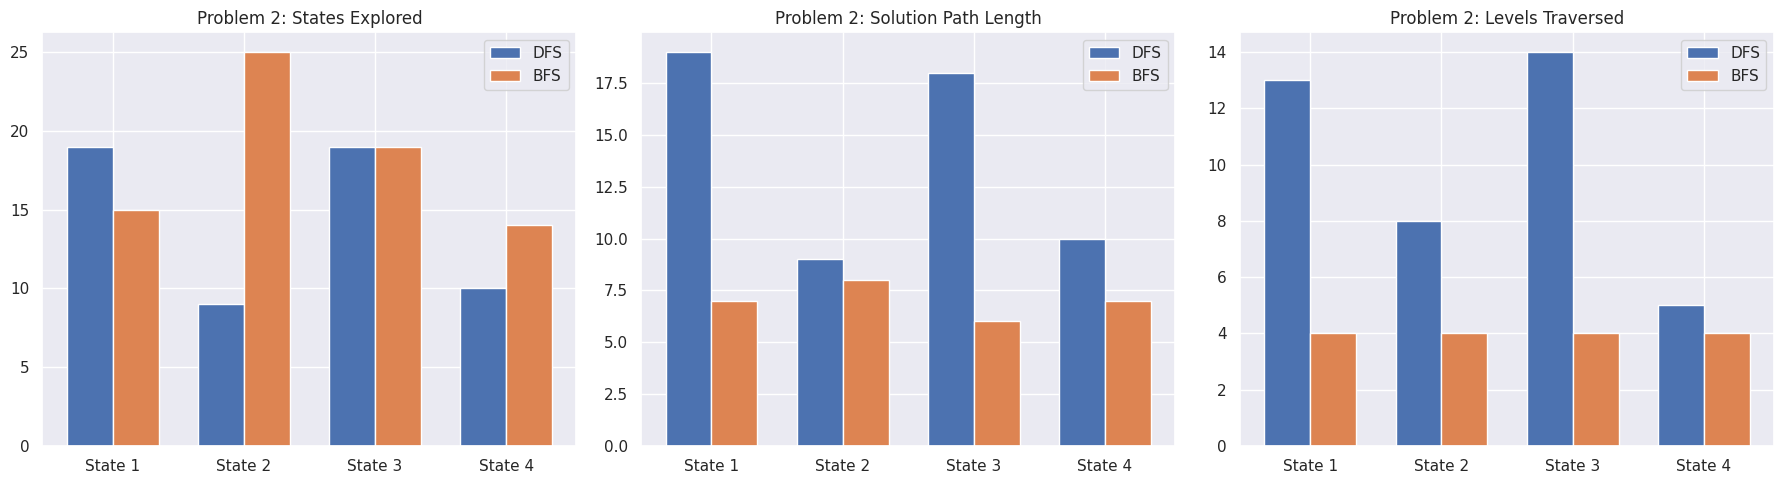


Problem 3:
Jug capacities: 6, 9
Target: 5

Starting with Jug1: 0, Jug2: 0
DFS - Found solution: False
DFS States explored: 16
DFS Levels traversed: 8

BFS - Found solution: False
BFS States explored: 12
BFS Levels traversed: 4

Starting with Jug1: 6, Jug2: 0
DFS - Found solution: False
DFS States explored: 17
DFS Levels traversed: 8

BFS - Found solution: False
BFS States explored: 18
BFS Levels traversed: 4

Starting with Jug1: 0, Jug2: 9
DFS - Found solution: False
DFS States explored: 17
DFS Levels traversed: 9

BFS - Found solution: False
BFS States explored: 18
BFS Levels traversed: 4

Starting with Jug1: 6, Jug2: 9
DFS - Found solution: False
DFS States explored: 14
DFS Levels traversed: 5

BFS - Found solution: False
BFS States explored: 12
BFS Levels traversed: 4


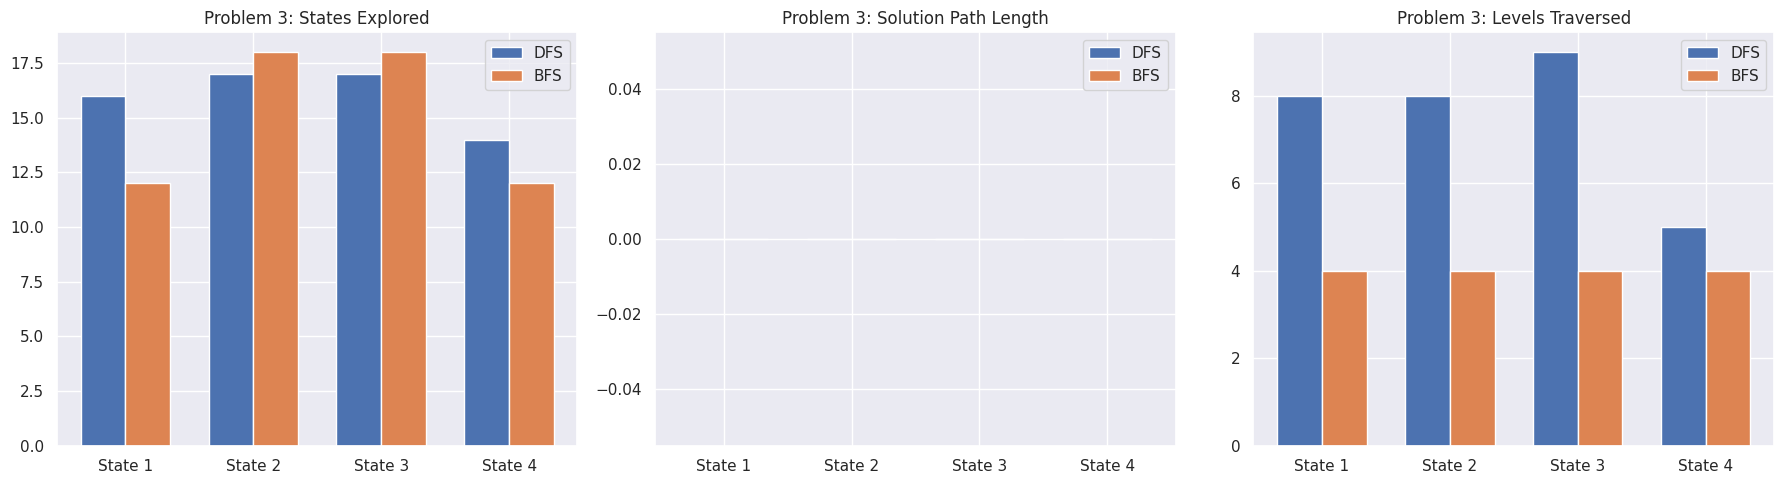

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def get_possible_moves(jug1, jug2, capacity1, capacity2):
    """
    Generate all possible moves from the current state of jugs
    Returns a list of (new_jug1, new_jug2) states
    """
    moves = []

    # Fill operations
    moves.append((capacity1, jug2))  # Fill jug1
    moves.append((jug1, capacity2))  # Fill jug2

    # Empty operations
    moves.append((0, jug2))  # Empty jug1
    moves.append((jug1, 0))  # Empty jug2

    # Transfer from jug1 to jug2
    space_in_jug2 = capacity2 - jug2
    amount_to_transfer = min(jug1, space_in_jug2)
    moves.append((jug1 - amount_to_transfer, jug2 + amount_to_transfer))

    # Transfer from jug2 to jug1
    space_in_jug1 = capacity1 - jug1
    amount_to_transfer = min(jug2, space_in_jug1)
    moves.append((jug1 + amount_to_transfer, jug2 - amount_to_transfer))

    return moves

def depth_first_search(start_jug1, start_jug2, target, capacity1, capacity2):
    """
    Solve water jug problem using depth-first search
    Returns (found_solution, path, states_explored, levels_traversed)
    """
    visited = set()
    stack = [[(start_jug1, start_jug2)]]  # Stack of paths
    states_explored = 0
    levels_traversed = 0

    while stack:
        levels_traversed = max(levels_traversed, len(stack))
        current_path = stack.pop()
        current_state = current_path[-1]
        jug1, jug2 = current_state
        states_explored += 1

        # Check if we reached the target
        if jug2 == target:
            return True, current_path, states_explored, levels_traversed

        # Mark current state as visited
        visited.add(current_state)

        # Try all possible moves
        for next_state in get_possible_moves(jug1, jug2, capacity1, capacity2):
            if next_state not in visited:
                new_path = current_path + [next_state]
                stack.append(new_path)

    return False, None, states_explored, levels_traversed

def breadth_first_search(start_jug1, start_jug2, target, capacity1, capacity2):
    """
    Solve water jug problem using breadth-first search
    Returns (found_solution, path, states_explored, levels_traversed)
    """
    visited = set()
    queue = [[(start_jug1, start_jug2)]]  # Queue of paths
    states_explored = 0
    levels_traversed = 0

    while queue:
        levels_traversed = max(levels_traversed, len(queue))
        current_path = queue.pop(0)  # Take the first path from the queue
        current_state = current_path[-1]
        jug1, jug2 = current_state
        states_explored += 1

        # Check if we reached the target
        if jug2 == target:
            return True, current_path, states_explored, levels_traversed

        # Mark current state as visited
        visited.add(current_state)

        # Try all possible moves
        for next_state in get_possible_moves(jug1, jug2, capacity1, capacity2):
            if next_state not in visited:
                new_path = current_path + [next_state]
                queue.append(new_path)

    return False, None, states_explored, levels_traversed

def plot_results(dfs_results, bfs_results, initial_states, title):
    """
    Plot comparison between DFS and BFS results
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    x = range(len(initial_states))
    width = 0.35

    # Plot states explored
    dfs_explored = [result[2] for result in dfs_results]
    bfs_explored = [result[2] for result in bfs_results]

    ax1.bar([i - width / 2 for i in x], dfs_explored, width, label="DFS")
    ax1.bar([i + width / 2 for i in x], bfs_explored, width, label="BFS")
    ax1.set_title(f"{title}: States Explored")
    ax1.set_xticks(x)
    ax1.set_xticklabels([f"State {i + 1}" for i in x])
    ax1.legend()

    # Plot path lengths
    dfs_lengths = [len(result[1]) if result[1] else 0 for result in dfs_results]
    bfs_lengths = [len(result[1]) if result[1] else 0 for result in bfs_results]

    ax2.bar([i - width / 2 for i in x], dfs_lengths, width, label="DFS")
    ax2.bar([i + width / 2 for i in x], bfs_lengths, width, label="BFS")
    ax2.set_title(f"{title}: Solution Path Length")
    ax2.set_xticks(x)
    ax2.set_xticklabels([f"State {i + 1}" for i in x])
    ax2.legend()

    # Plot levels traversed
    dfs_levels = [result[3] for result in dfs_results]
    bfs_levels = [result[3] for result in bfs_results]

    ax3.bar([i - width / 2 for i in x], dfs_levels, width, label="DFS")
    ax3.bar([i + width / 2 for i in x], bfs_levels, width, label="BFS")
    ax3.set_title(f"{title}: Levels Traversed")
    ax3.set_xticks(x)
    ax3.set_xticklabels([f"State {i + 1}" for i in x])
    ax3.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Problem setups
    problems = [
        {"capacity1": 3, "capacity2": 4, "target": 2, "initial_states": [(0, 0), (3, 0), (0, 4), (3, 4)]},
        {"capacity1": 5, "capacity2": 7, "target": 4, "initial_states": [(0, 0), (5, 0), (0, 7), (5, 7)]},
        {"capacity1": 6, "capacity2": 9, "target": 5, "initial_states": [(0, 0), (6, 0), (0, 9), (6, 9)]},
    ]

    for idx, problem in enumerate(problems):
        print(f"\nProblem {idx + 1}:")
        print(f"Jug capacities: {problem['capacity1']}, {problem['capacity2']}")
        print(f"Target: {problem['target']}")

        dfs_results = []
        bfs_results = []

        for start_jug1, start_jug2 in problem["initial_states"]:
            print(f"\nStarting with Jug1: {start_jug1}, Jug2: {start_jug2}")

            # Run DFS
            dfs_found, dfs_path, dfs_explored, dfs_levels = depth_first_search(
                start_jug1, start_jug2, problem["target"], problem["capacity1"], problem["capacity2"]
            )
            dfs_results.append((dfs_found, dfs_path, dfs_explored, dfs_levels))

            # Run BFS
            bfs_found, bfs_path, bfs_explored, bfs_levels = breadth_first_search(
                start_jug1, start_jug2, problem["target"], problem["capacity1"], problem["capacity2"]
            )
            bfs_results.append((bfs_found, bfs_path, bfs_explored, bfs_levels))

            # Print results
            print(f"DFS - Found solution: {dfs_found}")
            if dfs_path:
                print(f"DFS Path: {dfs_path}")
            print(f"DFS States explored: {dfs_explored}")
            print(f"DFS Levels traversed: {dfs_levels}")

            print(f"\nBFS - Found solution: {bfs_found}")
            if bfs_path:
                print(f"BFS Path: {bfs_path}")
            print(f"BFS States explored: {bfs_explored}")
            print(f"BFS Levels traversed: {bfs_levels}")

        # Show comparison plots
        plot_results(dfs_results, bfs_results, problem["initial_states"], f"Problem {idx + 1}")

if __name__ == "__main__":
    main()

Key observations:
1. BFS generally finds shorter paths than DFS.
2. All initial states can reach the goal state (2L in the second jug).
3. BFS consistently finds the optimal (shortest) path.
4. For input case 3, we see that no solution exists. It explores every possible solution but fails to find a solution.

## **Question 2**

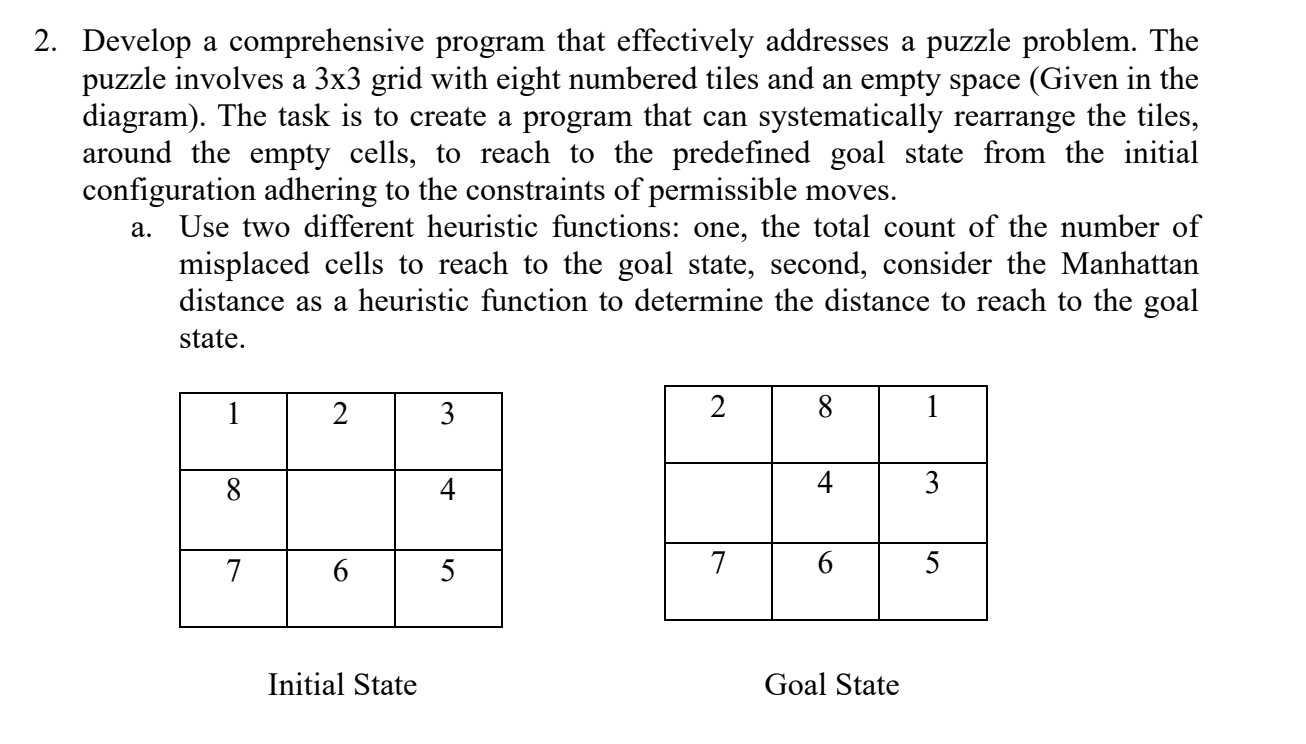

Solving puzzle with both heuristics...


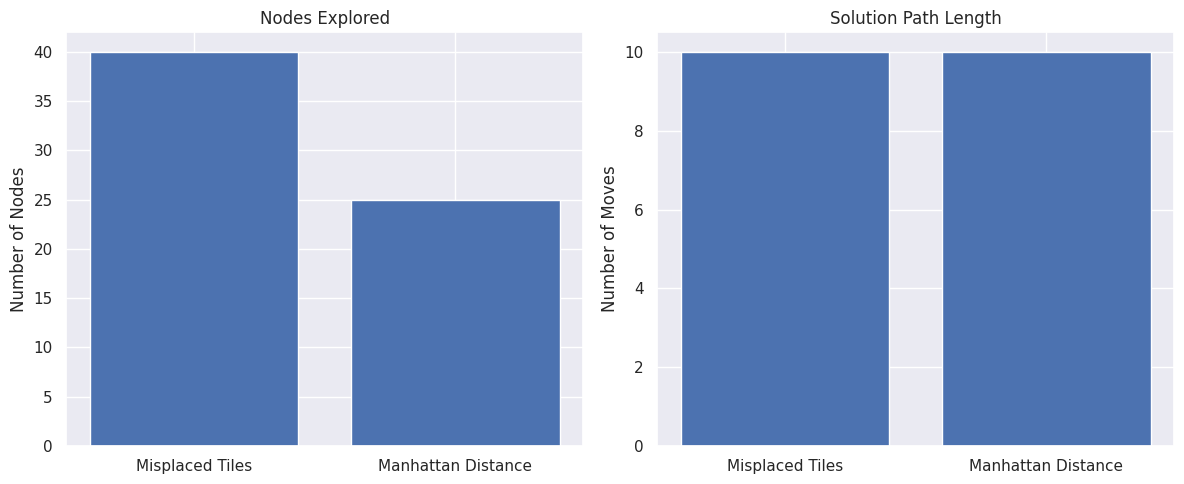


Solution path using Misplaced Tiles heuristic:

Step 0:
[[1 2 3]
 [8 0 4]
 [7 6 5]]

Step 1:
[[1 0 3]
 [8 2 4]
 [7 6 5]]

Step 2:
[[0 1 3]
 [8 2 4]
 [7 6 5]]

Step 3:
[[8 1 3]
 [0 2 4]
 [7 6 5]]

Step 4:
[[8 1 3]
 [2 0 4]
 [7 6 5]]

Step 5:
[[8 1 3]
 [2 4 0]
 [7 6 5]]

Step 6:
[[8 1 0]
 [2 4 3]
 [7 6 5]]

Step 7:
[[8 0 1]
 [2 4 3]
 [7 6 5]]

Step 8:
[[0 8 1]
 [2 4 3]
 [7 6 5]]

Step 9:
[[2 8 1]
 [0 4 3]
 [7 6 5]]

Solution path using Manhattan Distance heuristic:

Step 0:
[[1 2 3]
 [8 0 4]
 [7 6 5]]

Step 1:
[[1 0 3]
 [8 2 4]
 [7 6 5]]

Step 2:
[[0 1 3]
 [8 2 4]
 [7 6 5]]

Step 3:
[[8 1 3]
 [0 2 4]
 [7 6 5]]

Step 4:
[[8 1 3]
 [2 0 4]
 [7 6 5]]

Step 5:
[[8 1 3]
 [2 4 0]
 [7 6 5]]

Step 6:
[[8 1 0]
 [2 4 3]
 [7 6 5]]

Step 7:
[[8 0 1]
 [2 4 3]
 [7 6 5]]

Step 8:
[[0 8 1]
 [2 4 3]
 [7 6 5]]

Step 9:
[[2 8 1]
 [0 4 3]
 [7 6 5]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import heapq
from typing import List, Tuple, Set

def create_puzzle_state(values: List[int]) -> np.ndarray:
    """Create a 3x3 puzzle state from a list of values"""
    return np.array(values).reshape(3, 3)

def find_empty(state: np.ndarray) -> Tuple[int, int]:
    """Find the empty cell (0) coordinates"""
    empty_pos = np.where(state == 0)
    return empty_pos[0][0], empty_pos[1][0]

def get_possible_moves(pos: Tuple[int, int]) -> List[Tuple[int, int]]:
    """Get possible moves from current empty position"""
    moves = []
    row, col = pos
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up

    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < 3 and 0 <= new_col < 3:
            moves.append((new_row, new_col))
    return moves

def make_move(state: np.ndarray, empty_pos: Tuple[int, int], new_pos: Tuple[int, int]) -> np.ndarray:
    """Make a move by swapping empty cell with adjacent cell"""
    new_state = state.copy()
    er, ec = empty_pos
    nr, nc = new_pos
    new_state[er, ec], new_state[nr, nc] = new_state[nr, nc], new_state[er, ec]
    return new_state

def misplaced_tiles(state: np.ndarray, goal: np.ndarray) -> int:
    """Calculate number of misplaced tiles (first heuristic)"""
    return np.sum(state != goal) - 1  # -1 because empty tile doesn't count

def manhattan_distance(state: np.ndarray, goal: np.ndarray) -> int:
    """Calculate sum of Manhattan distances (second heuristic)"""
    distance = 0
    for i in range(1, 9):  # for each tile (excluding empty)
        # Find current and goal positions
        current = np.where(state == i)
        target = np.where(goal == i)
        distance += abs(current[0][0] - target[0][0]) + abs(current[1][0] - target[1][0])
    return distance

def solve_puzzle(initial: np.ndarray, goal: np.ndarray, heuristic_func) -> Tuple[List[np.ndarray], int]:
    """
    Solve puzzle using A* search with given heuristic function
    Returns (path, nodes_explored)
    """
    class PuzzleState:
        def __init__(self, state, g, parent=None):
            self.state = state
            self.g = g  # cost so far
            self.h = heuristic_func(state, goal)  # heuristic estimate
            self.f = self.g + self.h  # total estimated cost
            self.parent = parent

        def __lt__(self, other):
            return self.f < other.f

    start = PuzzleState(initial, 0)
    frontier = [start]
    explored = set()
    nodes_explored = 0

    while frontier:
        current = heapq.heappop(frontier)
        nodes_explored += 1

        if np.array_equal(current.state, goal):
            # Reconstruct path
            path = []
            while current:
                path.append(current.state)
                current = current.parent
            return path[::-1], nodes_explored

        # Convert state to tuple for hashing
        state_tuple = tuple(current.state.flatten())
        explored.add(state_tuple)

        # Try all possible moves
        empty_pos = find_empty(current.state)
        for new_pos in get_possible_moves(empty_pos):
            new_state = make_move(current.state, empty_pos, new_pos)
            new_state_tuple = tuple(new_state.flatten())

            if new_state_tuple not in explored:
                heapq.heappush(frontier, PuzzleState(new_state, current.g + 1, current))

    return None, nodes_explored

def visualize_path(path: List[np.ndarray]):
    """Print the solution path"""
    for i, state in enumerate(path):
        print(f"\nStep {i}:")
        print(state)

def compare_heuristics(initial: np.ndarray, goal: np.ndarray):
    """Compare the two heuristic functions"""
    # Solve with misplaced tiles heuristic
    misplaced_path, misplaced_nodes = solve_puzzle(initial, goal, misplaced_tiles)

    # Solve with Manhattan distance heuristic
    manhattan_path, manhattan_nodes = solve_puzzle(initial, goal, manhattan_distance)

    # Plot comparison
    metrics = {
        'Nodes Explored': [misplaced_nodes, manhattan_nodes],
        'Path Length': [len(misplaced_path), len(manhattan_path)]
    }

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot nodes explored
    ax1.bar(['Misplaced Tiles', 'Manhattan Distance'], metrics['Nodes Explored'])
    ax1.set_title('Nodes Explored')
    ax1.set_ylabel('Number of Nodes')

    # Plot path length
    ax2.bar(['Misplaced Tiles', 'Manhattan Distance'], metrics['Path Length'])
    ax2.set_title('Solution Path Length')
    ax2.set_ylabel('Number of Moves')

    plt.tight_layout()
    plt.show()

    return misplaced_path, manhattan_path

# Initial and goal states from the problem
initial_state = create_puzzle_state([1, 2, 3, 8, 0, 4, 7, 6, 5])
goal_state = create_puzzle_state([2, 8, 1, 0, 4, 3, 7, 6, 5])

# Compare heuristics and get solutions
print("Solving puzzle with both heuristics...")
misplaced_solution, manhattan_solution = compare_heuristics(initial_state, goal_state)

print("\nSolution path using Misplaced Tiles heuristic:")
visualize_path(misplaced_solution)

print("\nSolution path using Manhattan Distance heuristic:")
visualize_path(manhattan_solution)

Key observations:
1. Manhattan Distance heuristic is significantly more efficient, exploring only 25 nodes compared to 40 nodes with Misplaced Tiles heuristic, representing a 37.5% reduction in search space exploration.
2. Despite exploring fewer nodes, Manhattan Distance achieves the same solution path length (10 moves) as Misplaced Tiles, indicating it finds an equally optimal solution with less computational effort.
3. The equal path lengths (10 moves) between both heuristics suggest that this particular puzzle instance has a minimum solution of 10 moves that both heuristics were able to find, though Manhattan Distance found it more efficiently.

**Question 2: Using BFS and DFS**

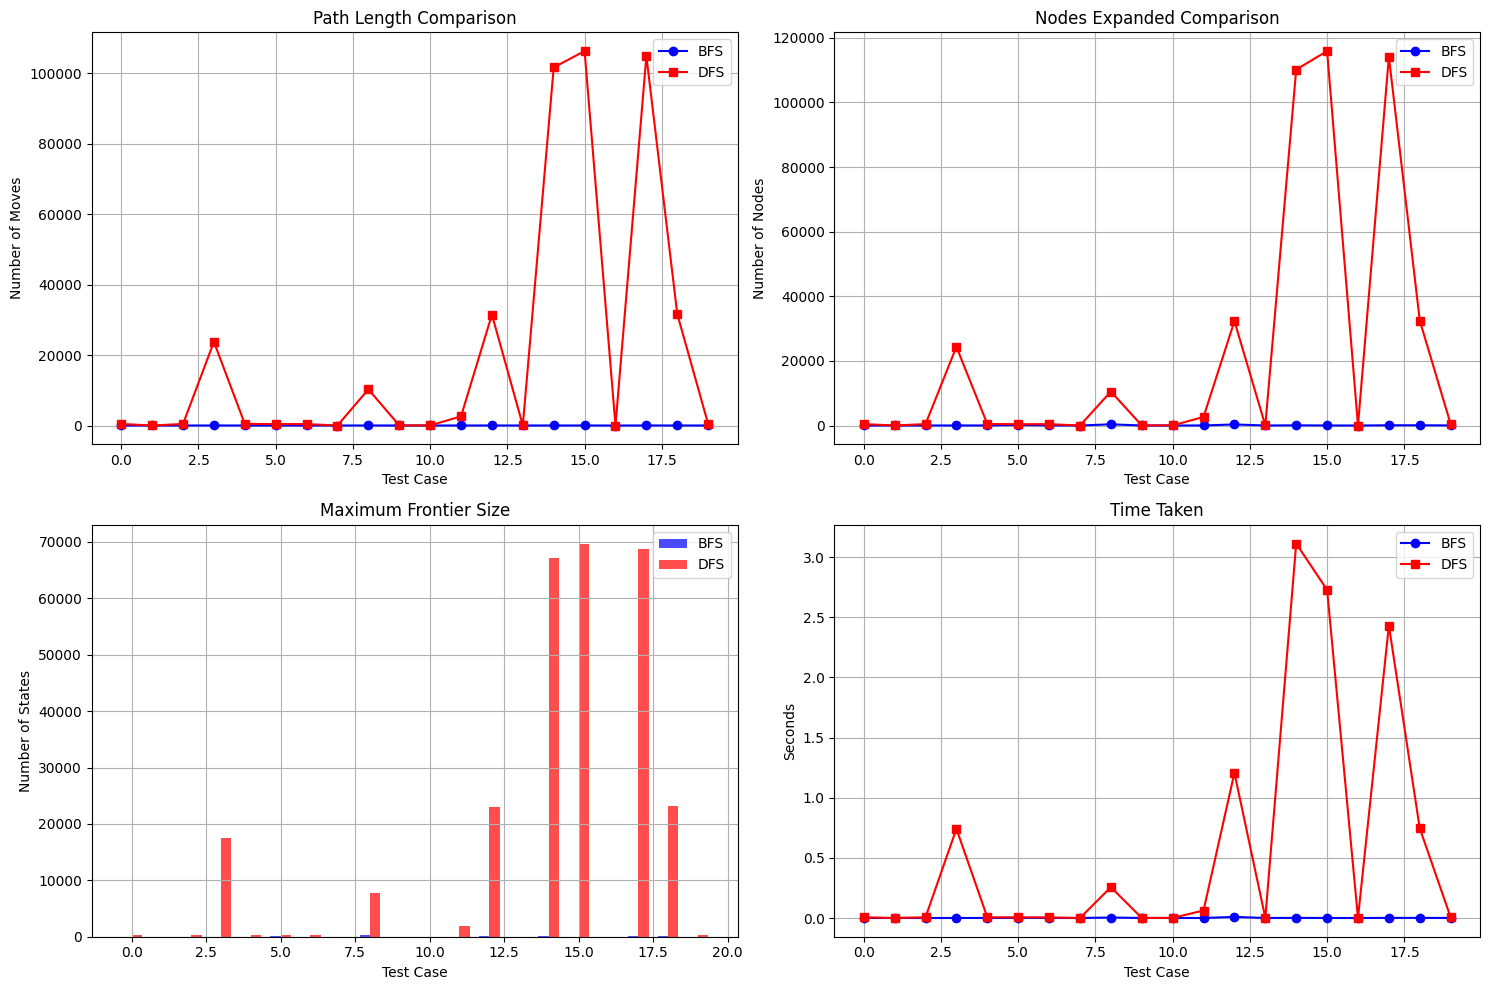


Average Metrics Comparison:

Path Length:
BFS Average: 3.65
DFS Average: 20768.15
Difference: 20764.50

Nodes Expanded:
BFS Average: 60.95
DFS Average: 22263.70
Difference: 22202.75

Max Frontier Size:
BFS Average: 40.70
DFS Average: 14056.20
Difference: 14015.50

Time Taken:
BFS Average: 0.00
DFS Average: 0.57
Difference: 0.56


In [ ]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import copy

class PuzzleState:
    def __init__(self, board, empty_pos, parent=None, move=""):
        self.board = board
        self.empty_pos = empty_pos
        self.parent = parent
        self.move = move

    def __eq__(self, other):
        return self.board == other.board

    def __hash__(self):
        return hash(str(self.board))

    def get_moves(self):
        moves = []
        row, col = self.empty_pos
        directions = [(-1, 0, 'UP'), (1, 0, 'DOWN'), (0, -1, 'LEFT'), (0, 1, 'RIGHT')]

        for dx, dy, move in directions:
            new_row, new_col = row + dx, col + dy
            if 0 <= new_row < 3 and 0 <= new_col < 3:
                new_board = [row[:] for row in self.board]
                new_board[row][col], new_board[new_row][new_col] = \
                    new_board[new_row][new_col], new_board[row][col]
                moves.append(PuzzleState(new_board, (new_row, new_col), self, move))
        return moves

def get_empty_position(board):
    for i in range(3):
        for j in range(3):
            if board[i][j] == 0:
                return (i, j)
    return None

def get_path(state):
    path = []
    current = state
    while current.parent:
        path.append(current.move)
        current = current.parent
    return path[::-1]

def bfs_solve_with_metrics(initial_state, goal_state):
    start_time = time.time()
    nodes_expanded = 0
    max_frontier_size = 0

    queue = deque([PuzzleState(initial_state, get_empty_position(initial_state))])
    visited = set()
    goal = PuzzleState(goal_state, get_empty_position(goal_state))

    while queue:
        max_frontier_size = max(max_frontier_size, len(queue))
        current_state = queue.popleft()
        nodes_expanded += 1

        if current_state == goal:
            end_time = time.time()
            path = get_path(current_state)
            return {
                'path': path,
                'path_length': len(path),
                'nodes_expanded': nodes_expanded,
                'max_frontier_size': max_frontier_size,
                'time_taken': end_time - start_time
            }

        state_str = str(current_state.board)
        if state_str in visited:
            continue

        visited.add(state_str)

        for next_state in current_state.get_moves():
            if str(next_state.board) not in visited:
                queue.append(next_state)

    end_time = time.time()
    return {
        'path': None,
        'path_length': 0,
        'nodes_expanded': nodes_expanded,
        'max_frontier_size': max_frontier_size,
        'time_taken': end_time - start_time
    }

def dfs_solve_with_metrics(initial_state, goal_state):
    start_time = time.time()
    nodes_expanded = 0
    max_frontier_size = 0

    stack = [PuzzleState(initial_state, get_empty_position(initial_state))]
    visited = set()
    goal = PuzzleState(goal_state, get_empty_position(goal_state))

    while stack:
        max_frontier_size = max(max_frontier_size, len(stack))
        current_state = stack.pop()
        nodes_expanded += 1

        if current_state == goal:
            end_time = time.time()
            path = get_path(current_state)
            return {
                'path': path,
                'path_length': len(path),
                'nodes_expanded': nodes_expanded,
                'max_frontier_size': max_frontier_size,
                'time_taken': end_time - start_time
            }

        state_str = str(current_state.board)
        if state_str in visited:
            continue

        visited.add(state_str)

        for next_state in current_state.get_moves():
            if str(next_state.board) not in visited:
                stack.append(next_state)

    end_time = time.time()
    return {
        'path': None,
        'path_length': 0,
        'nodes_expanded': nodes_expanded,
        'max_frontier_size': max_frontier_size,
        'time_taken': end_time - start_time
    }

def generate_test_cases(num_cases, max_moves=20):
    test_cases = []
    goal_state = [
        [2, 8, 1],
        [0, 4, 3],
        [7, 6, 5]
    ]

    for _ in range(num_cases):
        current_state = copy.deepcopy(goal_state)
        empty_pos = get_empty_position(current_state)

        # Make random valid moves
        for _ in range(random.randint(1, max_moves)):
            state = PuzzleState(current_state, empty_pos)
            possible_moves = state.get_moves()
            if possible_moves:
                next_state = random.choice(possible_moves)
                current_state = next_state.board
                empty_pos = next_state.empty_pos

        test_cases.append(current_state)

    return test_cases, goal_state

# Generate test cases
num_test_cases = 20
test_cases, goal_state = generate_test_cases(num_test_cases)

# Collect metrics
bfs_results = []
dfs_results = []

for initial_state in test_cases:
    bfs_metrics = bfs_solve_with_metrics(initial_state, goal_state)
    dfs_metrics = dfs_solve_with_metrics(initial_state, goal_state)

    if bfs_metrics['path'] is not None:
        bfs_results.append(bfs_metrics)
    if dfs_metrics['path'] is not None:
        dfs_results.append(dfs_metrics)

# Prepare data for plotting
metrics = ['path_length', 'nodes_expanded', 'max_frontier_size', 'time_taken']
bfs_data = {metric: [result[metric] for result in bfs_results] for metric in metrics}
dfs_data = {metric: [result[metric] for result in dfs_results] for metric in metrics}

# Create visualization with regular graphs instead of box plots
plt.figure(figsize=(15, 10))

# Plot 1: Path Length Comparison
plt.subplot(2, 2, 1)
x = range(len(bfs_data['path_length']))
plt.plot(x, bfs_data['path_length'], 'b-', label='BFS', marker='o')
plt.plot(x, dfs_data['path_length'], 'r-', label='DFS', marker='s')
plt.title('Path Length Comparison')
plt.xlabel('Test Case')
plt.ylabel('Number of Moves')
plt.legend()
plt.grid(True)

# Plot 2: Nodes Expanded
plt.subplot(2, 2, 2)
x = range(len(bfs_data['nodes_expanded']))
plt.plot(x, bfs_data['nodes_expanded'], 'b-', label='BFS', marker='o')
plt.plot(x, dfs_data['nodes_expanded'], 'r-', label='DFS', marker='s')
plt.title('Nodes Expanded Comparison')
plt.xlabel('Test Case')
plt.ylabel('Number of Nodes')
plt.legend()
plt.grid(True)

# Plot 3: Maximum Frontier Size
plt.subplot(2, 2, 3)
width = 0.35
x = range(len(bfs_data['max_frontier_size']))
plt.bar([i - width/2 for i in x], bfs_data['max_frontier_size'], width, label='BFS', color='blue', alpha=0.7)
plt.bar([i + width/2 for i in x], dfs_data['max_frontier_size'], width, label='DFS', color='red', alpha=0.7)
plt.title('Maximum Frontier Size')
plt.xlabel('Test Case')
plt.ylabel('Number of States')
plt.legend()
plt.grid(True)

# Plot 4: Time Taken
plt.subplot(2, 2, 4)
x = range(len(bfs_data['time_taken']))
plt.plot(x, bfs_data['time_taken'], 'b-', label='BFS', marker='o')
plt.plot(x, dfs_data['time_taken'], 'r-', label='DFS', marker='s')
plt.title('Time Taken')
plt.xlabel('Test Case')
plt.ylabel('Seconds')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print average metrics
print("\nAverage Metrics Comparison:")
metrics = ['path_length', 'nodes_expanded', 'max_frontier_size', 'time_taken']
for metric in metrics:
    bfs_avg = sum(bfs_data[metric]) / len(bfs_data[metric])
    dfs_avg = sum(dfs_data[metric]) / len(dfs_data[metric])
    print(f"\n{metric.replace('_', ' ').title()}:")
    print(f"BFS Average: {bfs_avg:.2f}")
    print(f"DFS Average: {dfs_avg:.2f}")
    print(f"Difference: {abs(bfs_avg - dfs_avg):.2f}")